In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("./tnr_cat.csv")

In [4]:
df.shape

(5404, 5)

In [5]:
df.columns

Index(['no', 'date', 'title', 'author', 'view'], dtype='object')

In [6]:
df.head()

,no,date,title,author,view
0,5404,2018-12-17,tne 신청합니다,깡탈,0
1,5403,2018-12-17,댓글확인요망 1 유석동물병원 tnr 재신청합니다,마산포도,1
2,5402,2018-12-15,접수 1 유석동물병원 TNR신청합니다,마산포도,1
3,5401,2018-12-14,접수 2 유석동물병원 TNR신청,허미야,1
4,5400,2018-12-14,접수 2 목동하니병원에 TNR신청합니다,소심한시민2018,2


In [7]:
df.describe(include="all")

,no,date,title,author,view
count,5404.000000,5404,5404,5404,5404.000000
unique,NaN,2257,4102,1324,NaN
top,NaN,2018-10-15,화신동물병원 TNR 신청합니다,lian,NaN
freq,NaN,11,32,101,NaN
mean,2702.500000,NaN,NaN,NaN,11.622872
std,1560.144758,NaN,NaN,NaN,13.513023
min,1.000000,NaN,NaN,NaN,0.000000
25%,1351.750000,NaN,NaN,NaN,4.000000
50%,2702.500000,NaN,NaN,NaN,8.000000
75%,4053.250000,NaN,NaN,NaN,16.000000


In [8]:
#많은 건수가 신청된 날 조회
df.date.value_counts().nlargest(10)

2018-10-15    11
2014-03-04     9
2016-05-20     9
2013-03-25     9
2017-04-12     9
2017-09-25     9
2018-11-26     9
2017-09-08     9
2017-11-27     8
2012-03-09     8
Name: date, dtype: int64

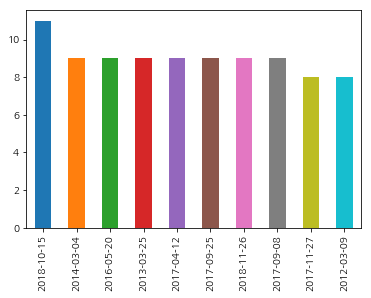

In [9]:
df.date.value_counts().nlargest(10).plot(kind="bar");

In [10]:
#많은 건수를 신청한 회원 조회
df.author.value_counts().nlargest(10)

lian          101
토실이            67
자자두            54
발광머리 앤         47
까만나비           46
아준마 (서울관악)     46
채플린            42
솜쟁이            37
피자(서울/낙성대)     37
하니하니           36
Name: author, dtype: int64

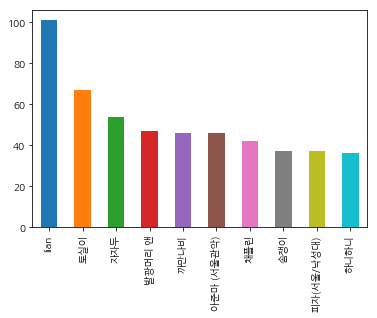

In [11]:
df.author.value_counts().nlargest(10).plot(kind="bar");

In [12]:
df.view.nlargest(10)

1682    532
4125    188
5141    168
5395    126
5364    109
3275     93
5365     91
5367     84
5394     84
5355     83
Name: view, dtype: int64

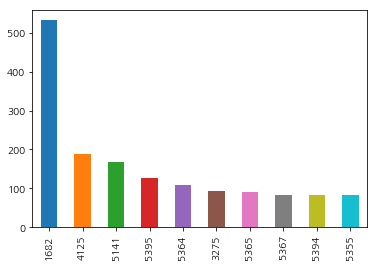

In [13]:
df.view.nlargest(10).plot(kind="bar");

In [14]:
df.iloc[1682]

no                  3722
date          2016-09-27
title     TNR 신청 전 필독 공지
author              운영지원
view                 532
Name: 1682, dtype: object

In [15]:
#운영진들에 의한 공지성 게시글을 살펴본다.
df[df['author'].str.contains("운영")]

,no,date,title,author,view
922,4482,2017-09-19,2017 추석 연휴 TNR 안내,운영지원2,58
1467,3937,2017-01-24,설 연휴 TNR 안내,운영지원,34
1471,3933,2017-01-18,화신 병원 TNR신청이 재개되었습니다,운영지원,18
1492,3912,2017-01-03,화신 TNR신청자분들에게 알립니다,운영지원,30
1682,3722,2016-09-27,TNR 신청 전 필독 공지,운영지원,532
1717,3687,2016-09-12,TNR 신청 전 필독 공지,운영지원,6
1722,3682,2016-09-08,안내 추석 연휴 기간 예약 안내,운영지원,43
1763,3641,2016-08-23,마포W병원 TNR 예약 신청 받지 않습니다,운영지원,24
1792,3612,2016-07-29,꽃냥이 기간은 6월에 끝났습니다,운영지원,46
1793,3611,2016-07-28,필독 유석병원 TNR 2016년 9월부터 가능합니다,운영지원,46


In [16]:
df=df[df['author'].str.contains("운영")!=True].copy()

In [17]:
df['date']=pd.to_datetime(df['date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5403
Data columns (total 5 columns):
no        5383 non-null int64
date      5383 non-null datetime64[ns]
title     5383 non-null object
author    5383 non-null object
view      5383 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 252.3+ KB


In [19]:
df["year_month"]=pd.to_datetime(df.date).dt.to_period('m')
df["year_week"]=pd.to_datetime(df.date).dt.to_period('w')

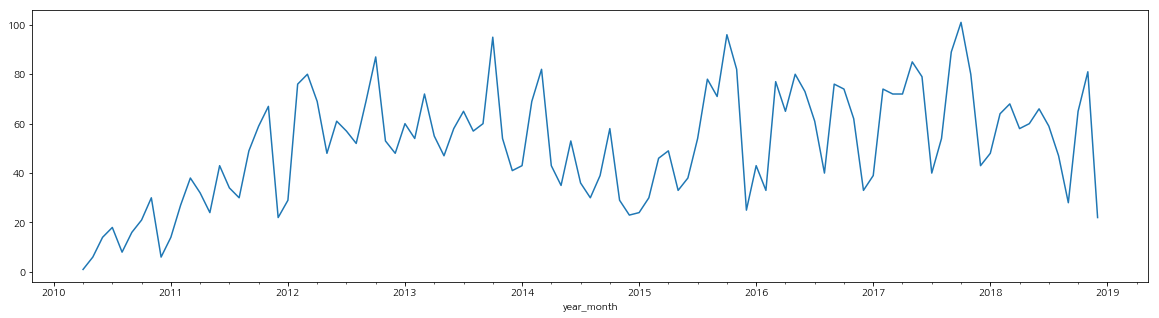

In [20]:
plt.figure(figsize=(20,5))
df.year_month.groupby(by=df['year_month']).count().plot();

In [21]:
df_new=df.year_month.groupby(by=df['year_week']).count()

In [22]:
df_new=df_new.to_frame()
df_new.columns=["counts"]

In [23]:
df_new.head()

,counts
year_week,
2010-04-26/2010-05-02,1
2010-05-03/2010-05-09,2
2010-05-24/2010-05-30,2
2010-05-31/2010-06-06,4
2010-06-07/2010-06-13,1


In [24]:
df_new.index=df_new.index.to_timestamp()

In [25]:
df_new=df_new.resample("W").sum()

In [26]:
df_new.index

DatetimeIndex(['2010-05-02', '2010-05-09', '2010-05-16', '2010-05-23',
               '2010-05-30', '2010-06-06', '2010-06-13', '2010-06-20',
               '2010-06-27', '2010-07-04',
               ...
               '2018-10-21', '2018-10-28', '2018-11-04', '2018-11-11',
               '2018-11-18', '2018-11-25', '2018-12-02', '2018-12-09',
               '2018-12-16', '2018-12-23'],
              dtype='datetime64[ns]', name='year_week', length=452, freq='W-SUN')

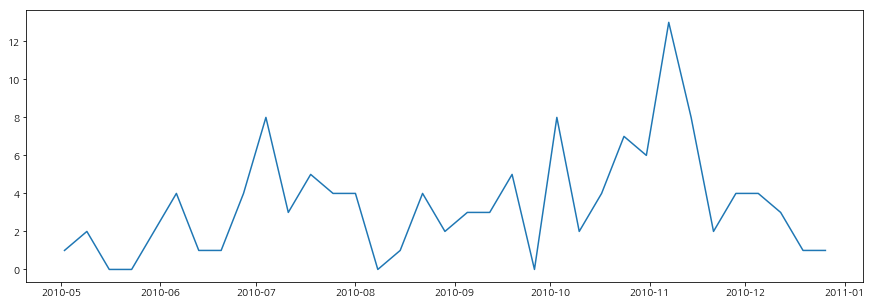

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_new[:"2010-12"])
plt.show()

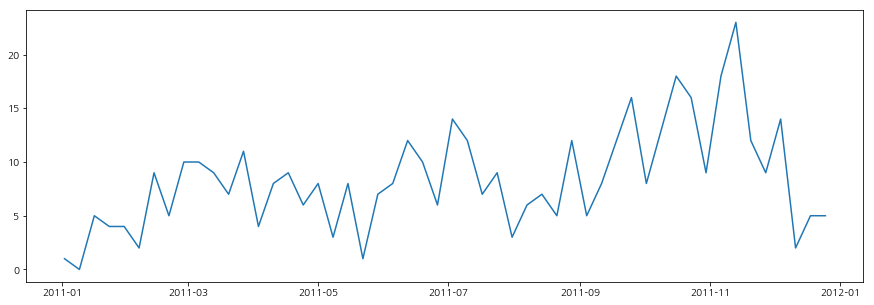

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2011-01":"2011-12"])
plt.show()

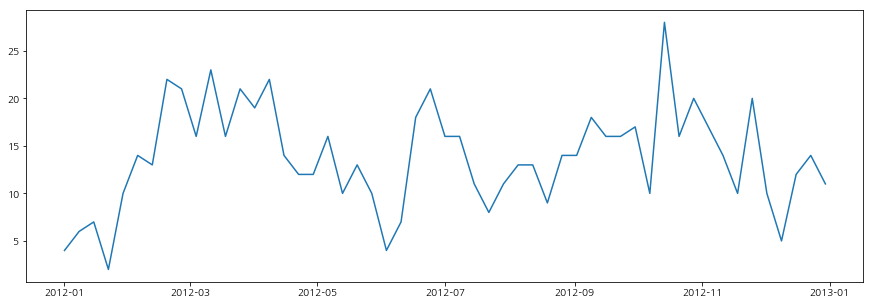

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2012-01":"2012-12"])
plt.show()

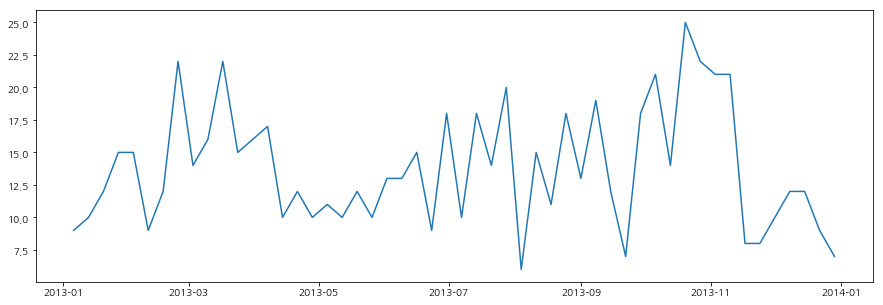

In [30]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2013-01":"2013-12"])
plt.show()

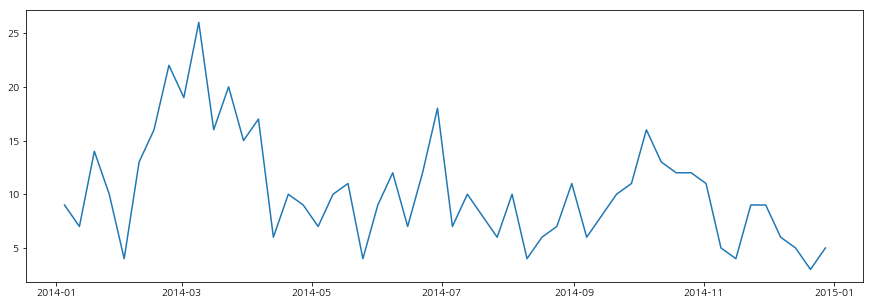

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2014-01":"2014-12"])
plt.show()

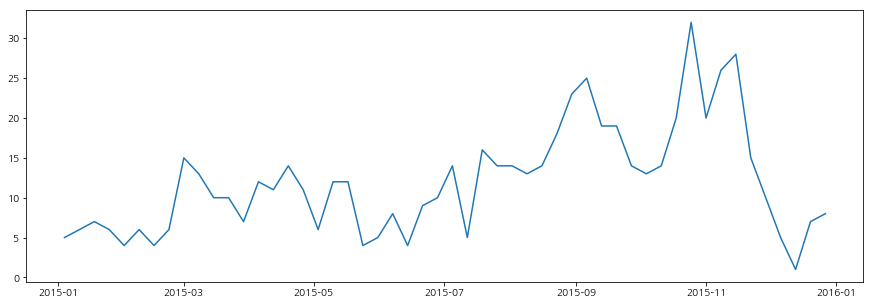

In [32]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2015-01":"2015-12"])
plt.show()

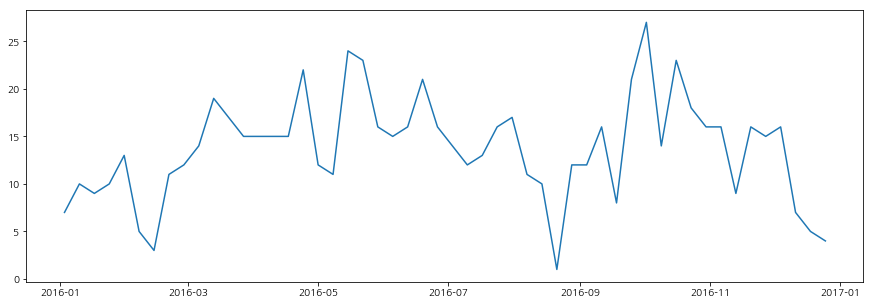

In [33]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2016-01":"2016-12"])
plt.show()

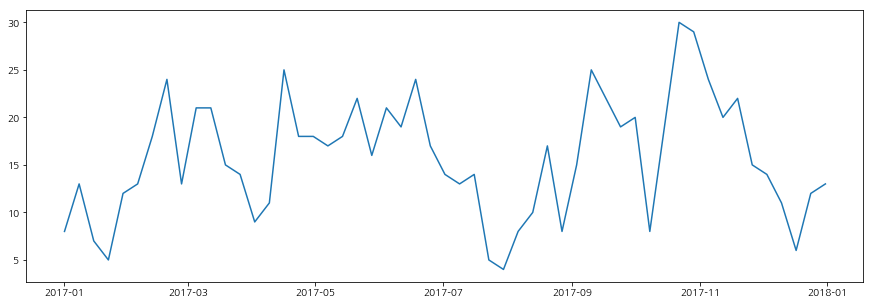

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2017-01":"2017-12"])
plt.show()

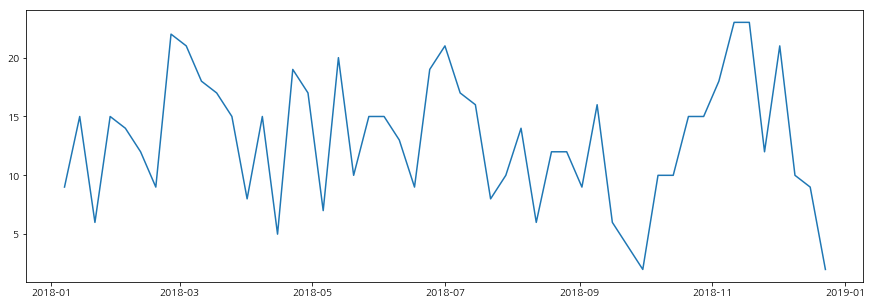

In [35]:
plt.figure(figsize=(15,5))
plt.plot(df_new["2018-01":])
plt.show()

In [36]:
df_new.describe()

,counts
count,452.000000
mean,11.909292
std,6.219075
min,0.000000
25%,7.000000
50%,12.000000
75%,16.000000
max,32.000000


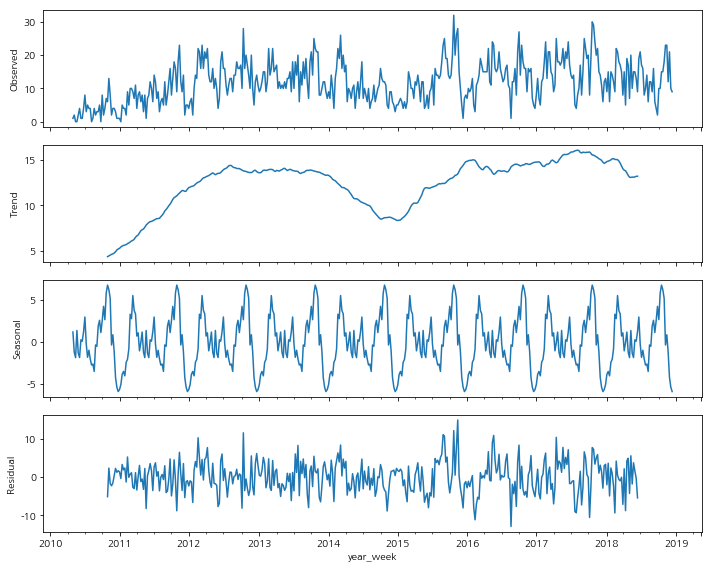

In [37]:
#분해 시계열을 만든다.
plt.rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df_new[:"2018-12-16"], model='additive')
decomposition.plot()
plt.show()

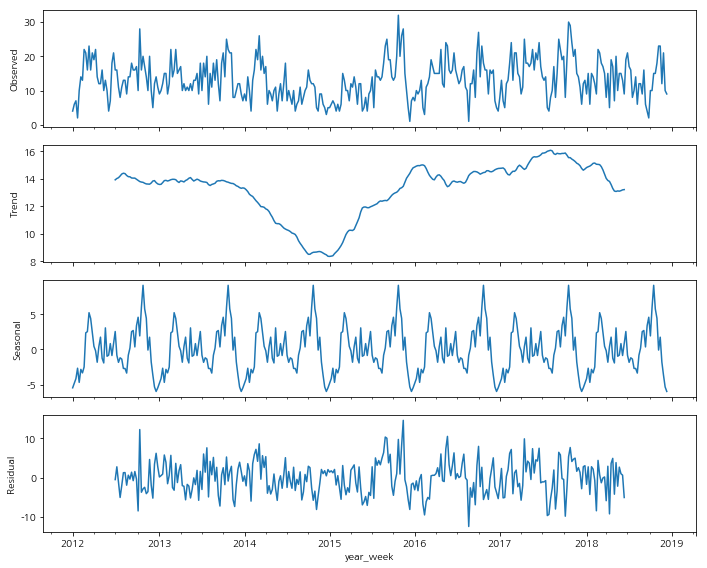

In [38]:
#분해 시계열을 만든다.
plt.rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df_new["2012":"2018-12-16"], model='additive')
decomposition.plot()
plt.show()

In [154]:
y=df_new["2015":"2018-12-16"].copy()

In [155]:
y.tail()

,counts
year_week,
2018-11-18,23
2018-11-25,12
2018-12-02,21
2018-12-09,10
2018-12-16,9


In [156]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

In [157]:
res_list=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
            
            results = mod.fit()
            
            print(param_seasonal)
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            res_list.append([param, param_seasonal, results.aic])
            
        except:
            continue

C:\Users\JJ\AppData\Local\Continuum\anaconda3\envs\tensorflow_g\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\JJ\AppData\Local\Continuum\anaconda3\envs\tensorflow_g\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1052: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



(0, 0, 0, 4)
ARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:1703.3302077823128
(0, 0, 1, 4)
ARIMA(0, 0, 0)x(0, 0, 1, 4)12 - AIC:1552.3444865789909
(0, 1, 0, 4)
ARIMA(0, 0, 0)x(0, 1, 0, 4)12 - AIC:1413.6667181302128
(0, 1, 1, 4)
ARIMA(0, 0, 0)x(0, 1, 1, 4)12 - AIC:1297.696332212374
(1, 0, 0, 4)
ARIMA(0, 0, 0)x(1, 0, 0, 4)12 - AIC:1408.3867555892461
(1, 0, 1, 4)
ARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:1323.2492076306166
(1, 1, 0, 4)
ARIMA(0, 0, 0)x(1, 1, 0, 4)12 - AIC:1360.4605792318944
(1, 1, 1, 4)
ARIMA(0, 0, 0)x(1, 1, 1, 4)12 - AIC:1293.7019069682983
(0, 0, 0, 4)
ARIMA(0, 0, 1)x(0, 0, 0, 4)12 - AIC:1525.8171549981903
(0, 0, 1, 4)


C:\Users\JJ\AppData\Local\Continuum\anaconda3\envs\tensorflow_g\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1051: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



ARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:1427.7711640816035
(0, 1, 0, 4)
ARIMA(0, 0, 1)x(0, 1, 0, 4)12 - AIC:1380.5733012200153
(0, 1, 1, 4)
ARIMA(0, 0, 1)x(0, 1, 1, 4)12 - AIC:1241.4008579249448
(1, 0, 0, 4)
ARIMA(0, 0, 1)x(1, 0, 0, 4)12 - AIC:1371.2883964424066
(1, 0, 1, 4)
ARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:1267.8388946075431
(1, 1, 0, 4)
ARIMA(0, 0, 1)x(1, 1, 0, 4)12 - AIC:1318.6447736487764
(1, 1, 1, 4)
ARIMA(0, 0, 1)x(1, 1, 1, 4)12 - AIC:1243.347507592203
(0, 0, 0, 4)
ARIMA(0, 1, 0)x(0, 0, 0, 4)12 - AIC:1304.0342030781458
(0, 0, 1, 4)
ARIMA(0, 1, 0)x(0, 0, 1, 4)12 - AIC:1279.4889755509657
(0, 1, 0, 4)
ARIMA(0, 1, 0)x(0, 1, 0, 4)12 - AIC:1446.2570800987614
(0, 1, 1, 4)
ARIMA(0, 1, 0)x(0, 1, 1, 4)12 - AIC:1269.2875954305082
(1, 0, 0, 4)
ARIMA(0, 1, 0)x(1, 0, 0, 4)12 - AIC:1284.7711925580425
(1, 0, 1, 4)
ARIMA(0, 1, 0)x(1, 0, 1, 4)12 - AIC:1281.2745349298432
(1, 1, 0, 4)
ARIMA(0, 1, 0)x(1, 1, 0, 4)12 - AIC:1350.0335649805888
(1, 1, 1, 4)
ARIMA(0, 1, 0)x(1, 1, 1, 4)12 - AIC:1269.01613227

In [158]:
result_all=pd.DataFrame(res_list, columns=["param"," param_seasonal","AIC"])
result_all[result_all["AIC"]==min(result_all["AIC"])]

,param,param_seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 4)",1218.946095


In [159]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7152      0.096      7.476      0.000       0.528       0.903
ma.L1         -0.2466      0.119     -2.065      0.039      -0.481      -0.013
ma.S.L4       -1.0000    287.757     -0.003      0.997    -564.994     562.994
sigma2        25.6129   7370.929      0.003      0.997   -1.44e+04    1.45e+04


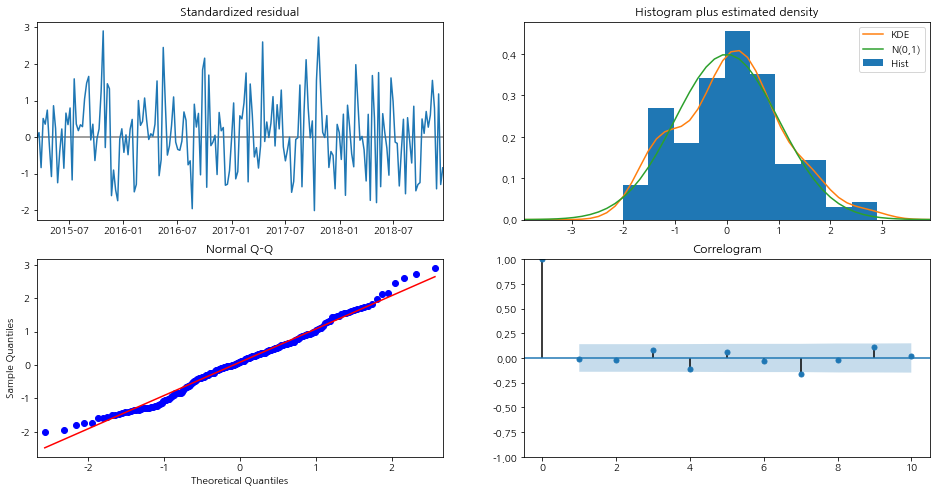

In [160]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

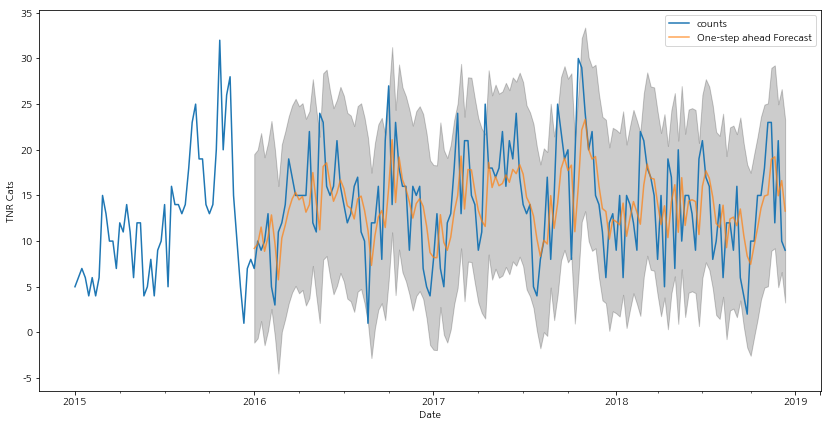

In [255]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-03'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot()
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('TNR Cats')
plt.legend()
plt.show()

In [266]:
y_forecasted = np.round(pred.predicted_mean)
y_truth = y['2016-01-03':]
mse=mean_squared_error(y_forecasted.values.reshape(-1,1), y_truth.values)
print('The Mean Squared Error of our forecasts is {}'.format(np.round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(np.round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 26.88
The Root Mean Squared Error of our forecasts is 5.18


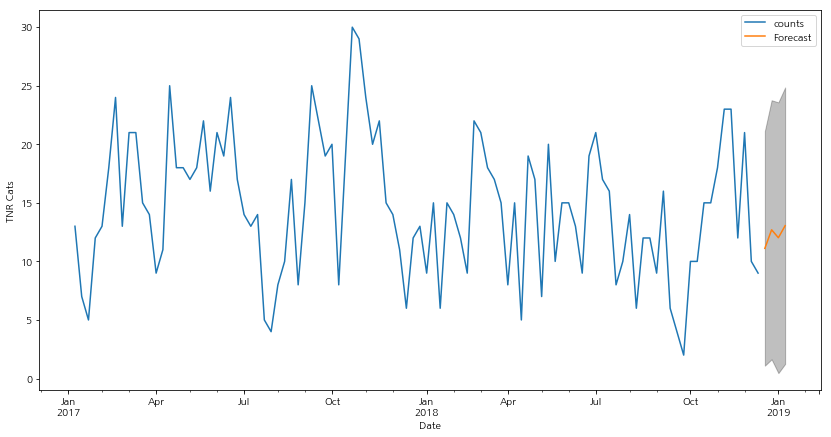

In [268]:
pred_uc = results.get_forecast(steps=4)
pred_ci = pred_uc.conf_int()
ax = y["2017-01-04":].plot(figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('TNR Cats')
plt.legend()
plt.show()

In [269]:
np.round(pred_uc.predicted_mean,0)

2018-12-23    11.0
2018-12-30    13.0
2019-01-06    12.0
2019-01-13    13.0
Freq: W-SUN, dtype: float64

In [270]:
from fbprophet import Prophet

In [279]:
y_prophet=y["2016-01-03":].copy()
y_prophet.reset_index(inplace=True)
y_prophet.columns=["ds","y"]

In [280]:
y_prophet.tail()

,ds,y
150,2018-11-18,23
151,2018-11-25,12
152,2018-12-02,21
153,2018-12-09,10
154,2018-12-16,9


In [281]:
prophet=Prophet(interval_width=0.95, seasonality_mode='multiplicative', 
                weekly_seasonality=False, daily_seasonality=False,
               growth="linear", changepoint_prior_scale=30)

In [282]:
prophet.fit(y_prophet);

In [283]:
future_dates = prophet.make_future_dataframe(periods=4, freq="W")

In [284]:
#prophet 모델이 예측을 시도한다.
#시간, 예측값, 하한, 상한이 순서대로 표시된다.
forecast = prophet.predict(future_dates)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
154,2018-12-16,7.821518,0.437850,14.727311
155,2018-12-23,7.228364,-0.285158,14.077643
156,2018-12-30,7.699967,0.656638,14.837878
157,2019-01-06,7.954227,-0.802528,16.426916
158,2019-01-13,7.648581,-2.373688,17.758402


In [285]:
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-03,8.912403,2.342042,15.908330
1,2016-01-10,8.772388,1.653042,15.275869
2,2016-01-17,8.248616,1.656114,14.804268
3,2016-01-24,7.934765,0.998983,14.976748
4,2016-01-31,7.871481,1.233410,15.203097


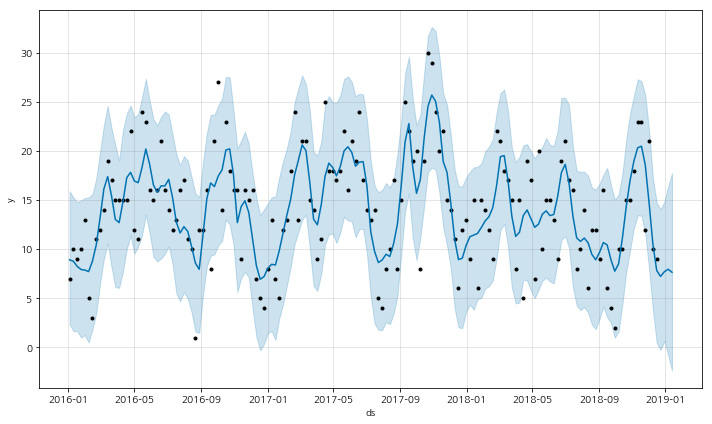

In [286]:
#음영은 가능할수도 있다고 보는 값
#점은 실제값
#파란선이 예측값이다.
prophet.plot(forecast, uncertainty=True);

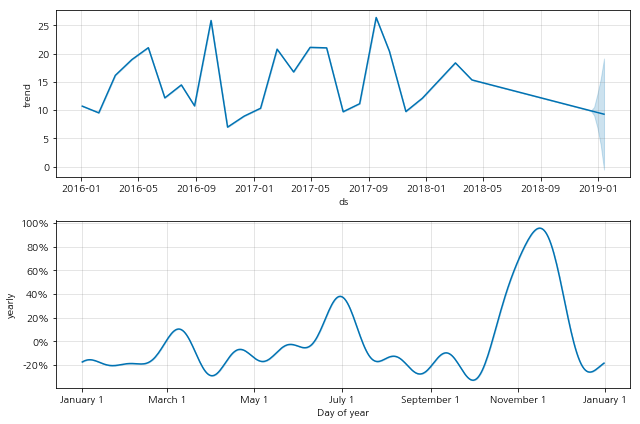

In [287]:
prophet.plot_components(forecast);

In [290]:
y_pred=np.round(forecast["yhat"][:-4].values)
y_true=y_prophet["y"].values
mse=mean_squared_error(y_pred, y_true)
print('The Mean Squared Error of our forecasts is {}'.format(np.round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(np.round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 13.06
The Root Mean Squared Error of our forecasts is 3.61
